# TO USE Scatter Plot!

In [167]:
import plotly.graph_objs as go
import pandas as pd

def create_scatterplot():

    # Load data for each year
    data = {}
    for year in range(2016, 2021):
        df = pd.read_csv(f"{year}_per_capita_analysis.csv")
        df = df.drop(df[df["State"] == "United States"].index)
        populations = pd.read_csv("us_cleaned_population.csv")
        populations = populations.drop(populations[populations["State"] == "United States"].index)
        df = pd.merge(df, populations, on="State")
        data[str(year)] = df

    # Create scatter plot
    fig = go.Figure()

    # Add scatter traces for each year
    for year, df in data.items():
        fig.add_trace(go.Scatter(
            x=df["Population"],
            y=df["Expenditure per Capita (in thousands)"],
            mode="markers",
            visible=(year == "2016"),
            name=year,
            marker=dict(
                size=10,
                color=df["Expenditure per Capita (in thousands)"],
                colorscale="Viridis",
                colorbar=dict(title="Expenditure per Capita (in thousands)")
            ),
            text=df["State"]
        ))

    # Calculate mean Expenditure per Capita for the year
    mean_expenditure = df["Expenditure per Capita (in thousands)"].mean()

    # Add mean line
    fig.add_shape(
        type="line",
        x0=df["Population"].min(),
        x1=df["Population"].max(),
        y0=mean_expenditure,
        y1=mean_expenditure,
        line=dict(
            color="red",
            width=2,
        )
    )

    # Add annotation for mean line
    fig.add_annotation(
        x=df["Population"].max(),
        y=mean_expenditure,
        text="Mean",
        showarrow=False,
        font=dict(
            size=12,
            color="red"
        ),
        xanchor="left",
        yanchor="top",
        xshift=10,
        yshift=10,
    )

    # Customize layout
    fig.update_layout(
        title="Expenditure per Capita vs Population",
        xaxis_title="Population",
        yaxis_title="Expenditure per Capita (in thousands)", 
    )

    # Add dropdown menu
    dropdown_menu = []
    for year in range(2016, 2021):
        dropdown_menu.append(
            dict(
                label=str(year),
                method="update",
                args=[
                    {"visible": [y == str(year) for y in data.keys()]},
                    {"title": f"Expenditure per Capita vs Population ({year})"}
                ]
            )
        )
    fig.update_layout(
        updatemenus=[dict(
            type="dropdown",
            active=0,
            buttons=dropdown_menu,
            x=0.1,
            y=1.1,
            xanchor="left",
            yanchor="top"
        )]
    )
    
    # Show plot
    fig.show()

# Call function to create scatter plot
create_scatterplot()


# Bar chart - all category

In [66]:
import pandas as pd
import plotly.express as px

# Read in the data
df = pd.read_csv('us_funding_time_series.csv')

# Melt the data so that each row represents a single observation
df_melt = pd.melt(df, id_vars=['NAICS Category'], var_name='Year', value_name='Percentage')

# Create the stacked bar chart using Plotly Express
fig = px.bar(df_melt, x='Year', y='Percentage', color='NAICS Category', barmode='stack')

# Update the x-axis to show only the years
fig.update_xaxes(type='category')

# Show the chart
fig.show()


In [116]:
import pandas as pd
import plotly.express as px

# Read in the data
df = pd.read_csv('us_funding_time_series.csv')

# Sort the data by the last year (2020) and select only the top 10 categories
df_top_10 = df.sort_values(by='2020', ascending=False).head(10)

# Filter the original dataframe to include only the top 10 categories
df_filtered = df[df['NAICS Category'].isin(df_top_10['NAICS Category'])]

# Melt the data so that each row represents a single observation
df_melt = pd.melt(df_filtered, id_vars=['NAICS Category'], var_name='Year', value_name='Percentage')

# Create the stacked bar chart using Plotly Express
fig = px.bar(df_melt, x='Year', y='Percentage', color='NAICS Category', barmode='stack')

# Update the x-axis to show only the years
fig.update_xaxes(type='category')

# Show the chart
fig.show()


# Bar chart - top 10 categories

In [169]:
import pandas as pd
import plotly.express as px

def create_stacked_bar_chart():

    # Read in the data
    df = pd.read_csv('us_funding_time_series.csv')

    # Calculate the mean funding percentage for each category over the 5-year period
    df_mean = df.loc[:, '2016':'2020'].mean(axis=1)
    df_mean.index = df['NAICS Category']
    df_mean = df_mean.reset_index(name='Mean Percentage')

    # Sort the data by the mean funding percentage and select only the top 10 categories
    df_top_10 = df_mean.sort_values(by='Mean Percentage', ascending=False).head(10)
    category_order = df_top_10['NAICS Category'].tolist()

    # Filter the original dataframe to include only the top 10 categories
    df_filtered = df[df['NAICS Category'].isin(category_order)]

    # Melt the data so that each row represents a single observation
    df_melt = pd.melt(df_filtered, id_vars=['NAICS Category'], var_name='Year', value_name='Funding Percentage')

    # Create the stacked bar chart using Plotly Express and set the category order
    fig = px.bar(df_melt, x='Year', y='Funding Percentage', color='NAICS Category', barmode='stack', category_orders={'NAICS Category': category_order})

    # Update the figure information
    fig.update_xaxes(type='category')
    fig.update_layout(title='Top 10 Categories receiving Federal Funding by Year (2016-2020)')

    # Show the chart
    fig.show()

create_stacked_bar_chart()


# Bar chart - least 10 categories and Drafts

In [114]:
import pandas as pd
import plotly.express as px

# Read in the data
df = pd.read_csv('us_funding_time_series.csv')

# Sort the data by the last year (2020) and select only the top 10 categories
df_top_10 = df.sort_values(by='2020', ascending=True).head(10)

# Filter the original dataframe to include only the top 10 categories
df_filtered = df[df['NAICS Category'].isin(df_top_10['NAICS Category'])]

# Melt the data so that each row represents a single observation
df_melt = pd.melt(df_filtered, id_vars=['NAICS Category'], var_name='Year', value_name='Percentage')

# Set the order of the categories based on funding for 2020 (descending)
category_order = df_top_10['NAICS Category'].tolist()[::-1]

# Create the stacked bar chart using Plotly Express and set the category order
fig = px.bar(df_melt, x='Year', y='Percentage', color='NAICS Category', barmode='stack', category_orders={'NAICS Category': category_order})

# Update the x-axis to show only the years
fig.update_xaxes(type='category')

# Show the chart
fig.show()


In [153]:
import pandas as pd
import plotly.express as px

# Read in the data
df = pd.read_csv('us_funding_time_series.csv')

# Sort the data by the last year (2020) and select only the top 10 categories
df_top_10 = df.sort_values(by='2020', ascending=False).head(10)

# Filter the original dataframe to include only the top 10 categories
df_filtered = df[df['NAICS Category'].isin(df_top_10['NAICS Category'])]

# Melt the data so that each row represents a single observation
df_melt = pd.melt(df_filtered, id_vars=['NAICS Category'], var_name='Year', value_name='Percentage')

# Set the order of the categories based on funding for 2020 (ascending)
category_order = df_top_10['NAICS Category'].tolist()

# Create the stacked bar chart using Plotly Express and set the category order
fig = px.bar(df_melt, x='Year', y='Percentage', color='NAICS Category', barmode='stack', category_orders={'NAICS Category': category_order})

# Update the x-axis to show only the years
fig.update_xaxes(type='category')

# Show the chart
fig.show()


# Stack Area chart - all category Draft

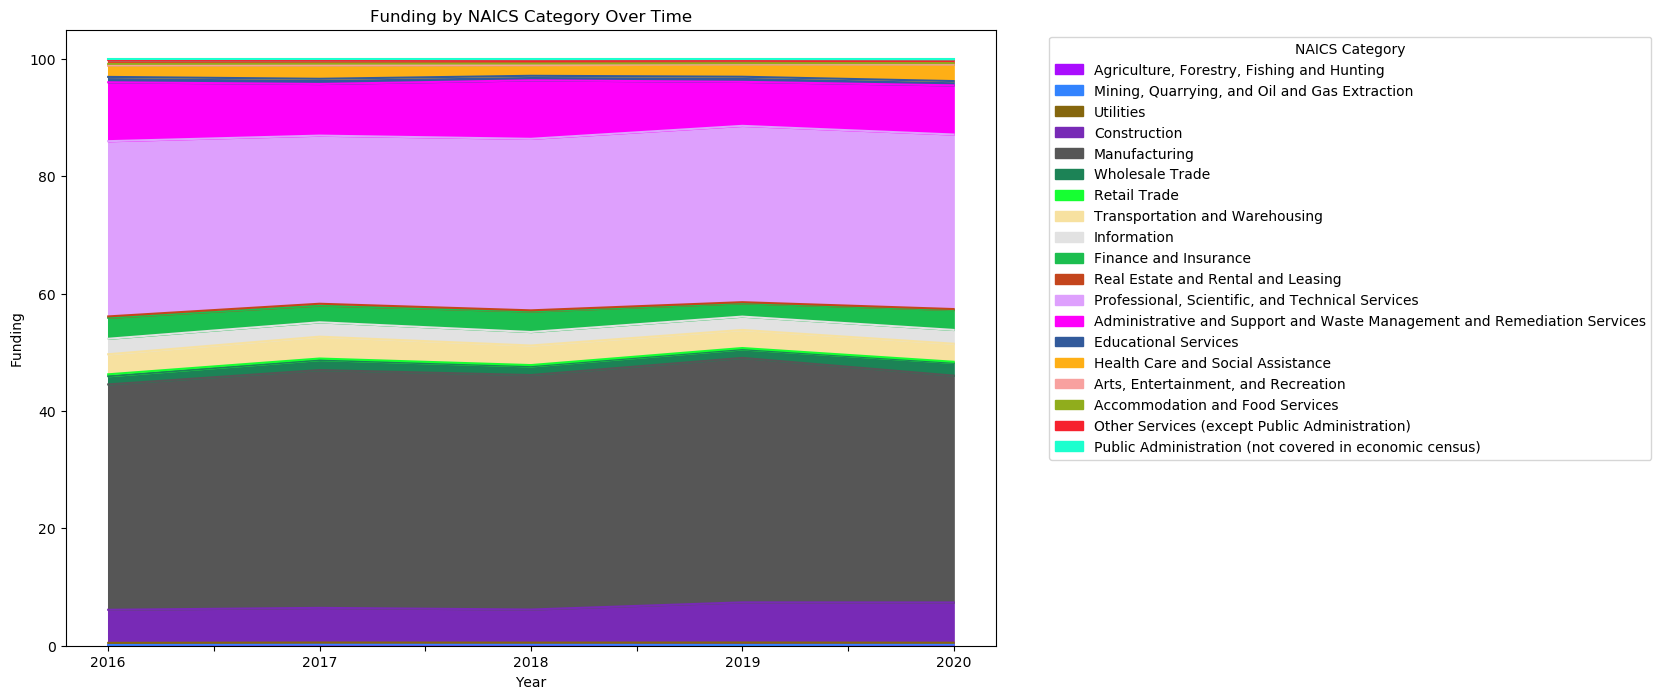

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read CSV file
df = pd.read_csv('us_funding_time_series.csv', index_col=0)

# Generate a list of 19 pretty and distinguishable colors
colors = px.colors.qualitative.Alphabet[:19]

# Plot stacked area chart with the colors
df.T.plot(kind='area', stacked=True, figsize=(12,8), color=colors)

# Add title and labels
plt.title('Funding by NAICS Category Over Time')
plt.xlabel('Year')
plt.ylabel('Funding')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.show()


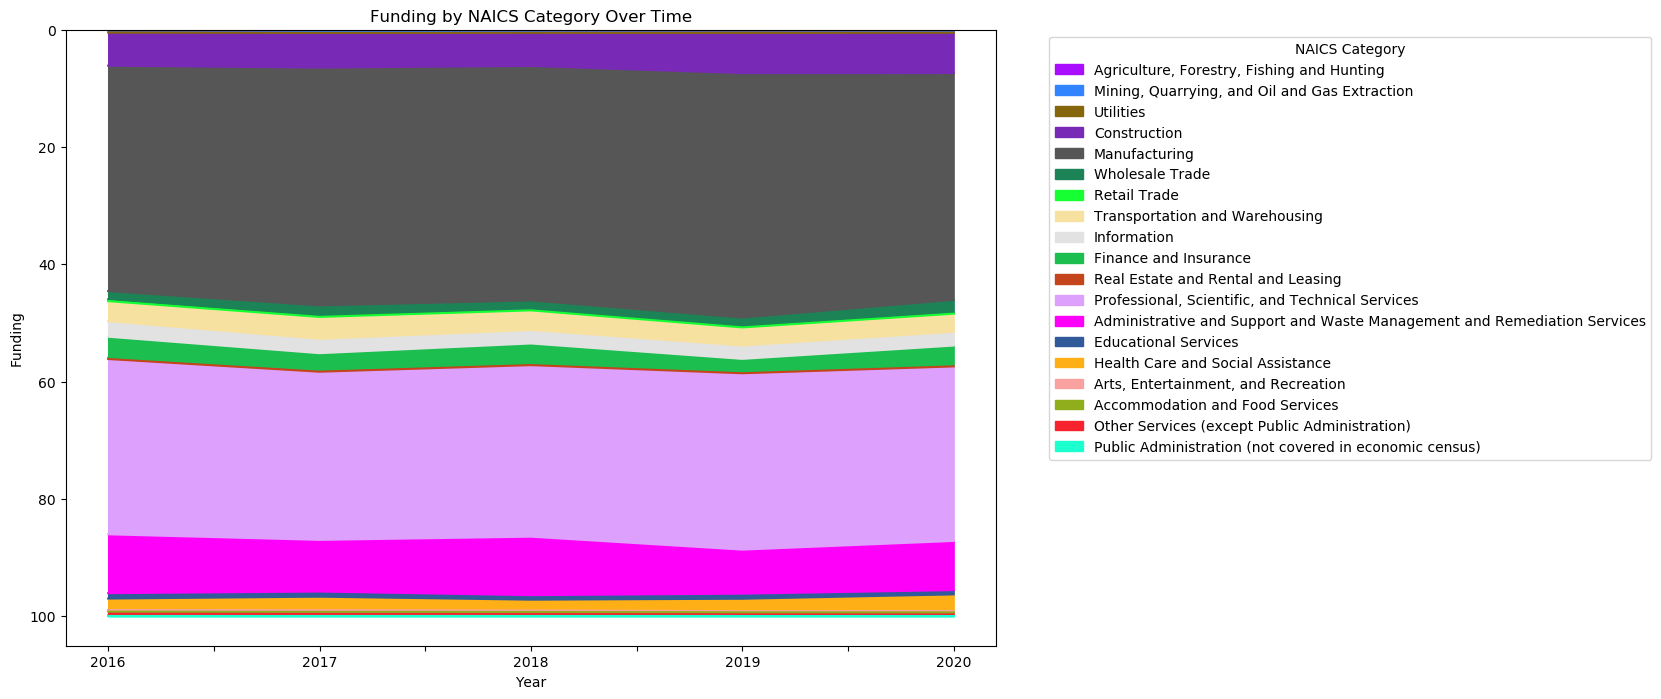

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read CSV file
df = pd.read_csv('us_funding_time_series.csv', index_col=0)

# Generate a list of 19 pretty and distinguishable colors
colors = px.colors.qualitative.Alphabet[:19]

# Plot stacked area chart with the colors
ax = df.T.plot(kind='area', stacked=True, figsize=(12,8), color=colors)

# Invert the y-axis
ax.invert_yaxis()

# Add title and labels
plt.title('Funding by NAICS Category Over Time')
plt.xlabel('Year')
plt.ylabel('Funding')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.show()


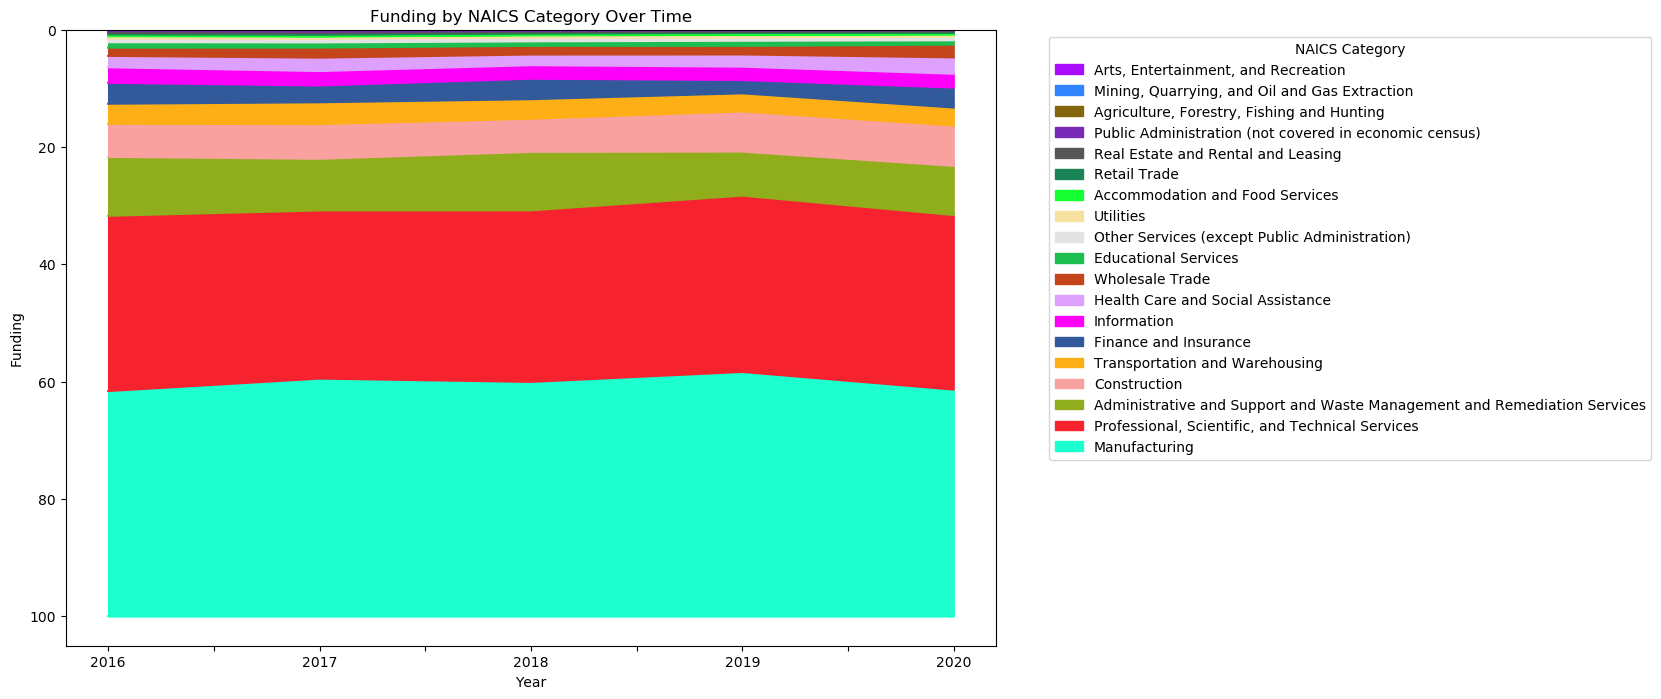

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read CSV file
df = pd.read_csv('us_funding_time_series.csv', index_col=0)

# Calculate total funding for each category and sort categories based on total funding
totals = df.sum(axis=1)
sorted_categories = totals.sort_values().index

# Reorder the rows of the DataFrame based on the sorted categories
df = df.loc[sorted_categories]

# Generate a list of 19 pretty and distinguishable colors
colors = px.colors.qualitative.Alphabet[:19]

# Plot stacked area chart with the colors
ax = df.T.plot(kind='area', stacked=True, figsize=(12,8), color=colors)

# Invert the y-axis
ax.invert_yaxis()

# Add title and labels
plt.title('Funding by NAICS Category Over Time')
plt.xlabel('Year')
plt.ylabel('Funding')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.show()


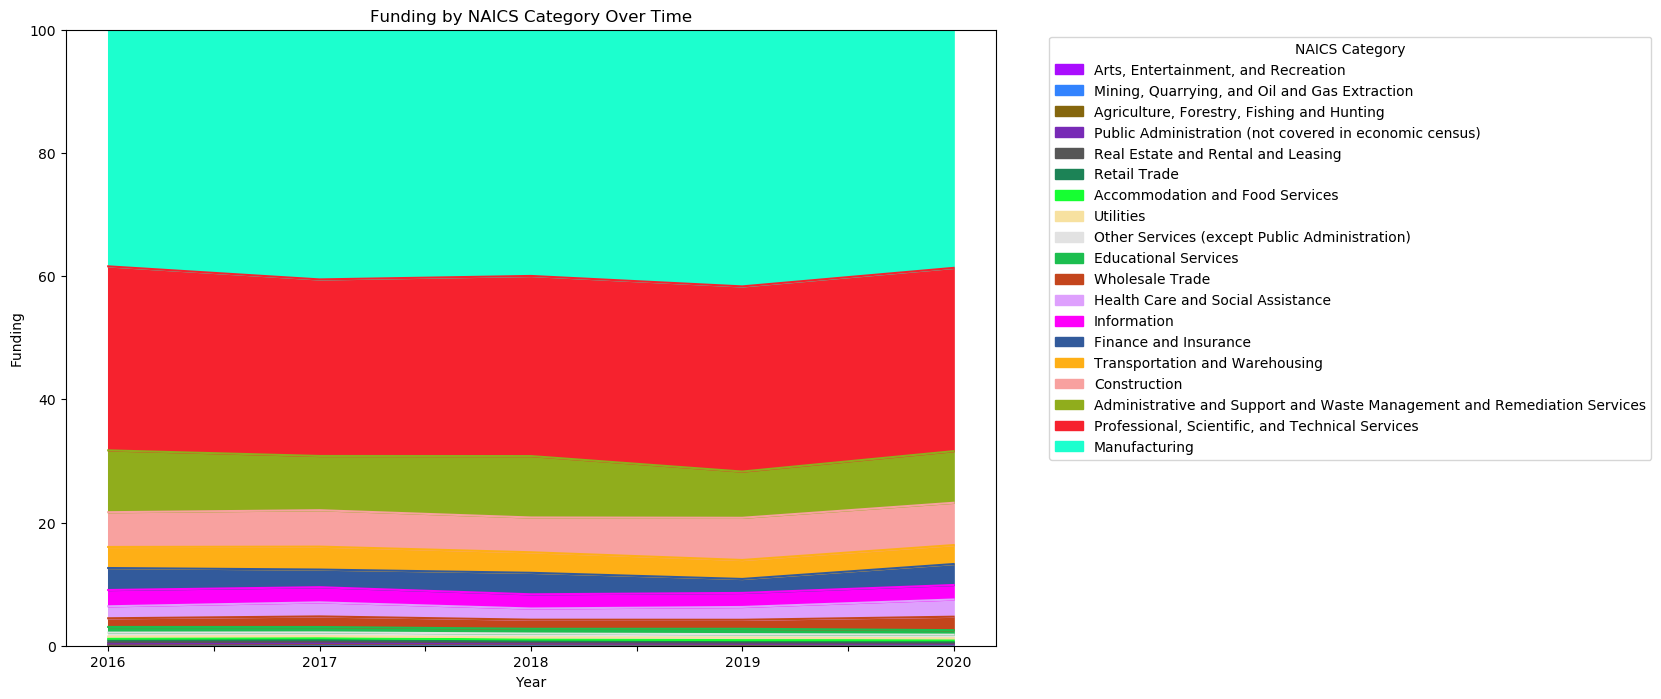

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read CSV file
df = pd.read_csv('us_funding_time_series.csv', index_col=0)

# Calculate total funding for each category and sort categories based on total funding
totals = df.sum(axis=1)
sorted_categories = totals.sort_values().index

# Reorder the rows of the DataFrame based on the sorted categories
df = df.loc[sorted_categories]

# Generate a list of 19 pretty and distinguishable colors
colors = px.colors.qualitative.Alphabet[:19]

# Plot stacked area chart with the colors and set y-axis limits
df.T.plot(kind='area', stacked=True, figsize=(12,8), color=colors, ylim=(0, 100))

# Add title and labels
plt.title('Funding by NAICS Category Over Time')
plt.xlabel('Year')
plt.ylabel('Funding')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.show()


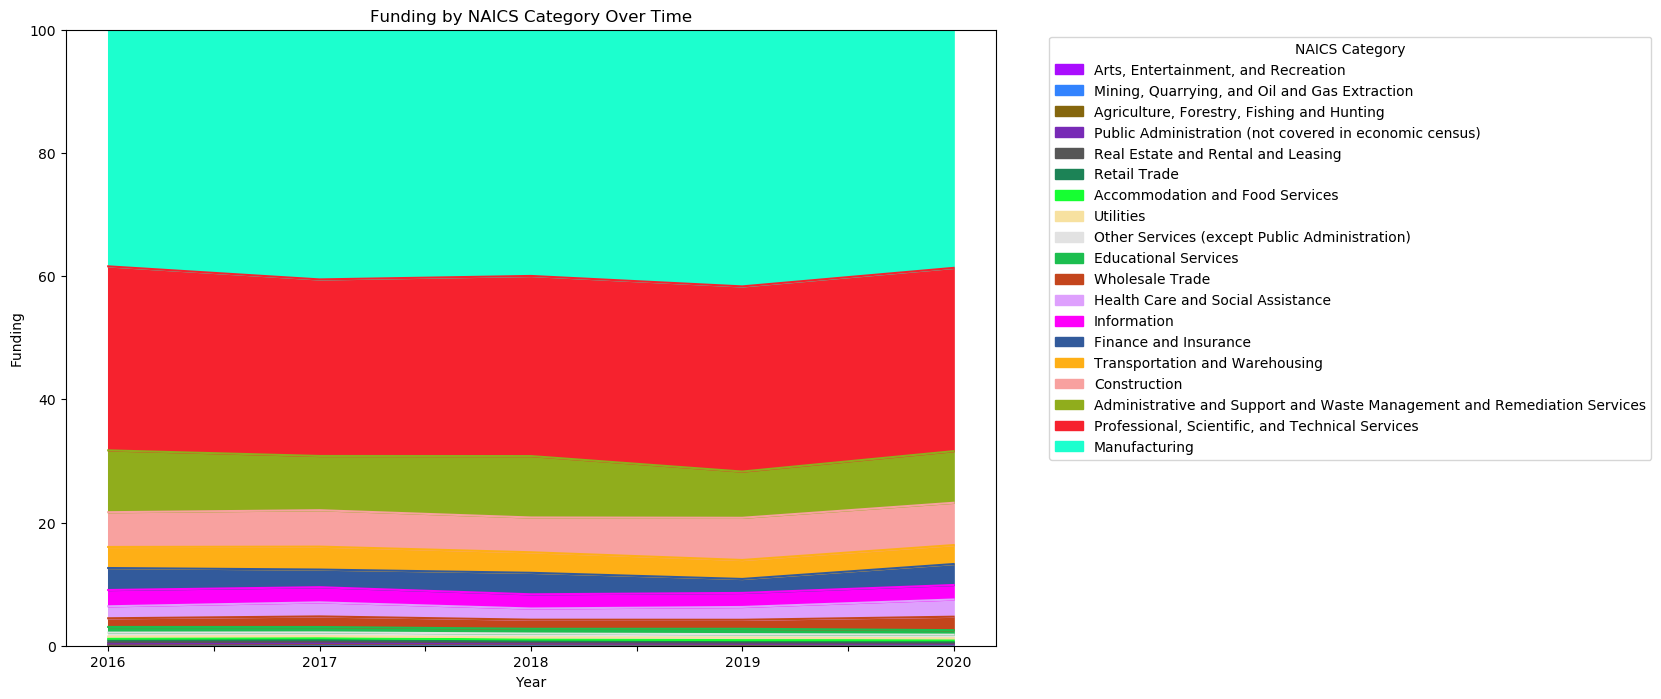

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read CSV file
df = pd.read_csv('us_funding_time_series.csv', index_col=0)

# Sort the DataFrame in descending order based on the sum of each row
df = df.loc[df.sum(axis=1).sort_values(ascending=True).index]

# Generate a list of 19 pretty and distinguishable colors
colors = px.colors.qualitative.Alphabet[:19]

# Plot stacked area chart with the colors and set y-axis limits
df.T.plot(kind='area', stacked=True, figsize=(12,8), color=colors, ylim=(0, 100))

# Add title and labels
plt.title('Funding by NAICS Category Over Time')
plt.xlabel('Year')
plt.ylabel('Funding')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.show()


# TO USE: Stack Area Map

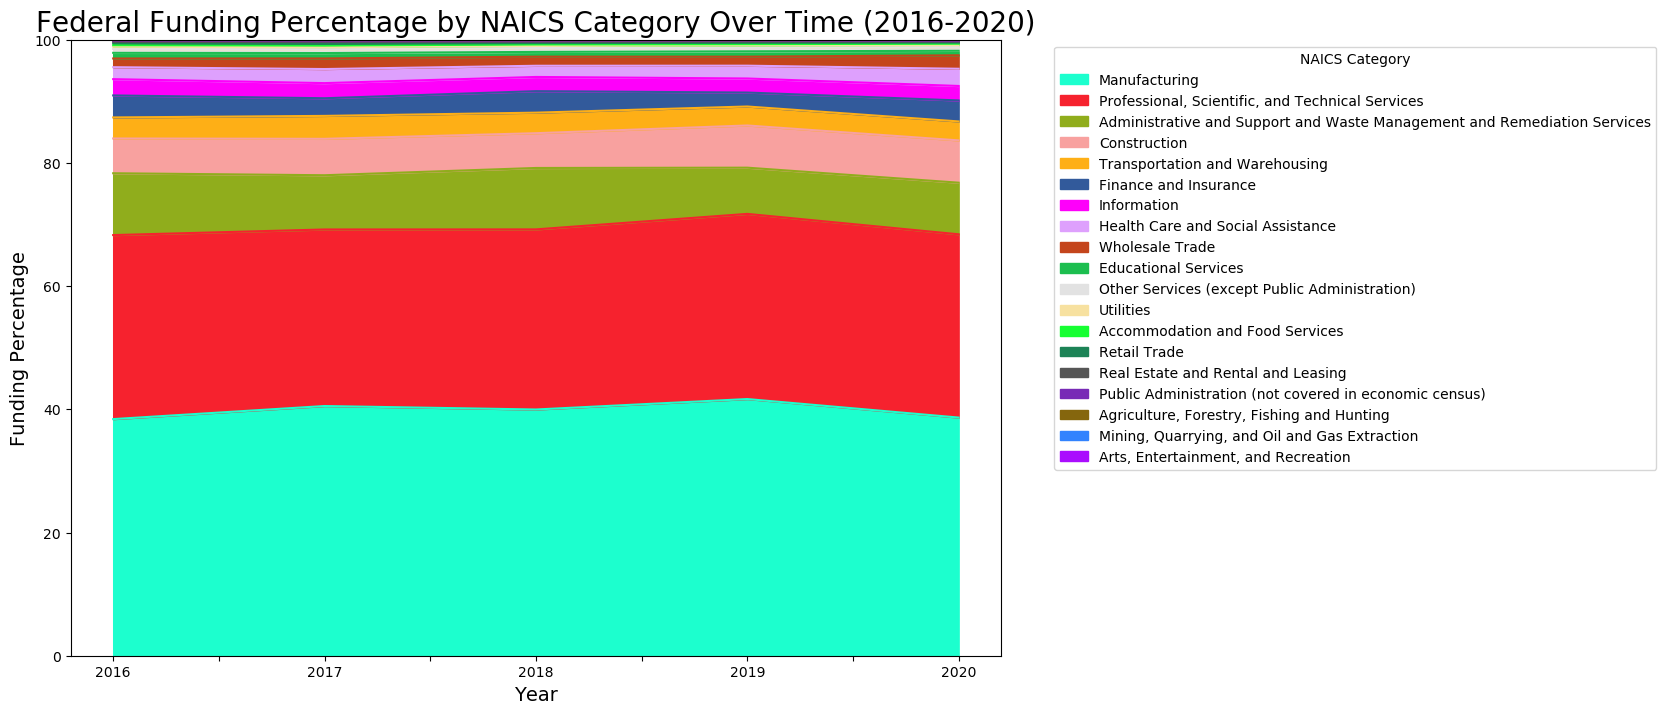

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

def create_stacked_area_chart():

    # Read CSV file
    df = pd.read_csv('us_funding_time_series.csv', index_col=0)

    # Sort the DataFrame in descending order based on the sum of each row
    df = df.loc[df.sum(axis=1).sort_values(ascending=True).index]

    # Reverse the order of the rows
    df = df.iloc[::-1]

    # Generate a list of 19 pretty and distinguishable colors
    colors = px.colors.qualitative.Alphabet[:19][::-1]

    # Plot stacked area chart with the colors and set y-axis limits
    df.T.plot(kind='area', stacked=True, figsize=(12,8), color=colors, ylim=(0, 100))

    # Add title and labels
    plt.title('Federal Funding Percentage by NAICS Category Over Time (2016-2020)', fontsize=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Funding Percentage', fontsize=14)
    plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show chart
    plt.show()

create_stacked_area_chart()


# Stack Area Map Drafts

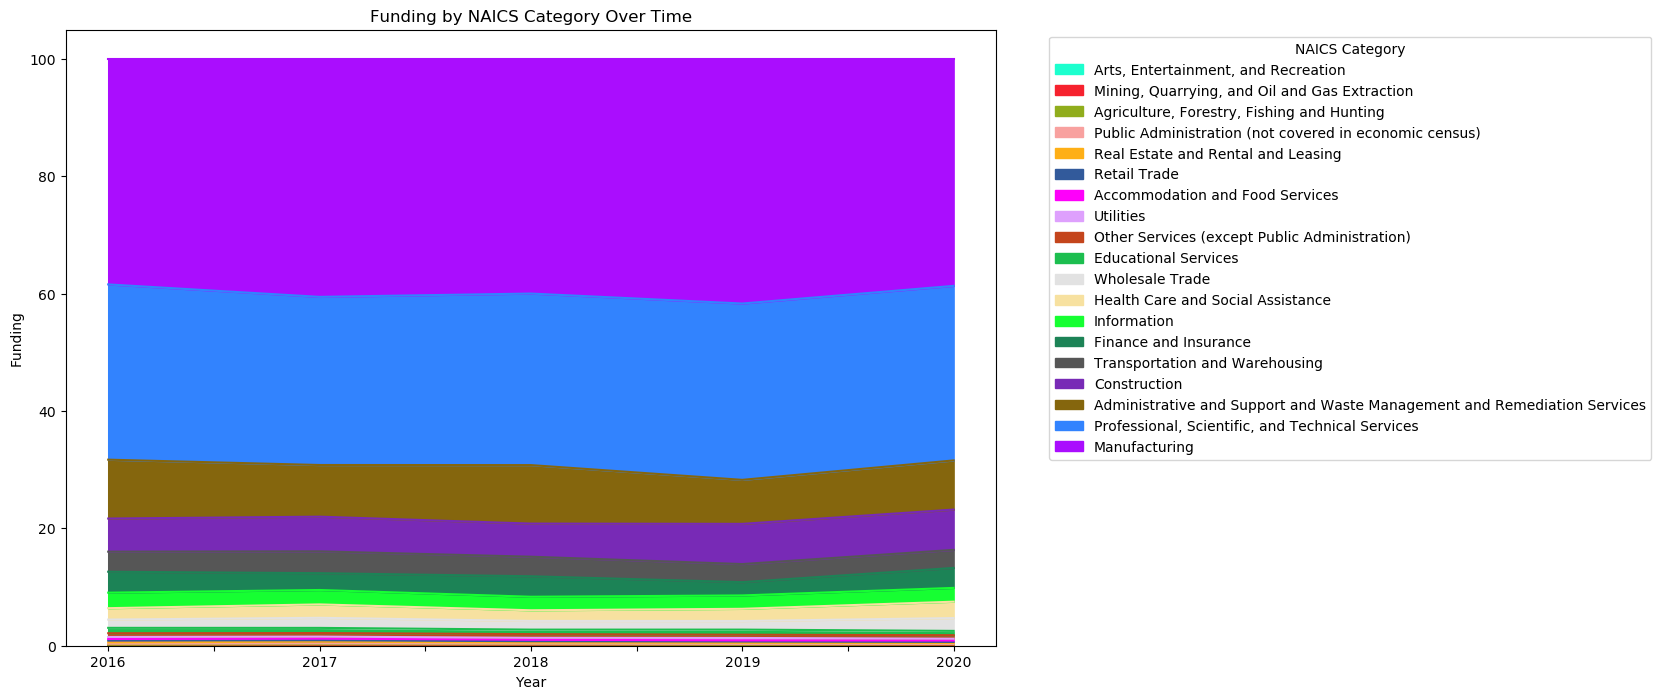

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read CSV file
df = pd.read_csv('us_funding_time_series.csv', index_col=0)

# Sort the DataFrame by the sum of each row
df = df.loc[df.sum(axis=1).sort_values().index]

# Generate a list of 19 pretty and distinguishable colors in the sorted order
colors = px.colors.qualitative.Alphabet[:19][::-1]

# Plot stacked area chart with the colors
ax = df.T.plot(kind='area', stacked=True, figsize=(12,8), color=colors)

# Add title and labels
plt.title('Funding by NAICS Category Over Time')
plt.xlabel('Year')
plt.ylabel('Funding')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.show()


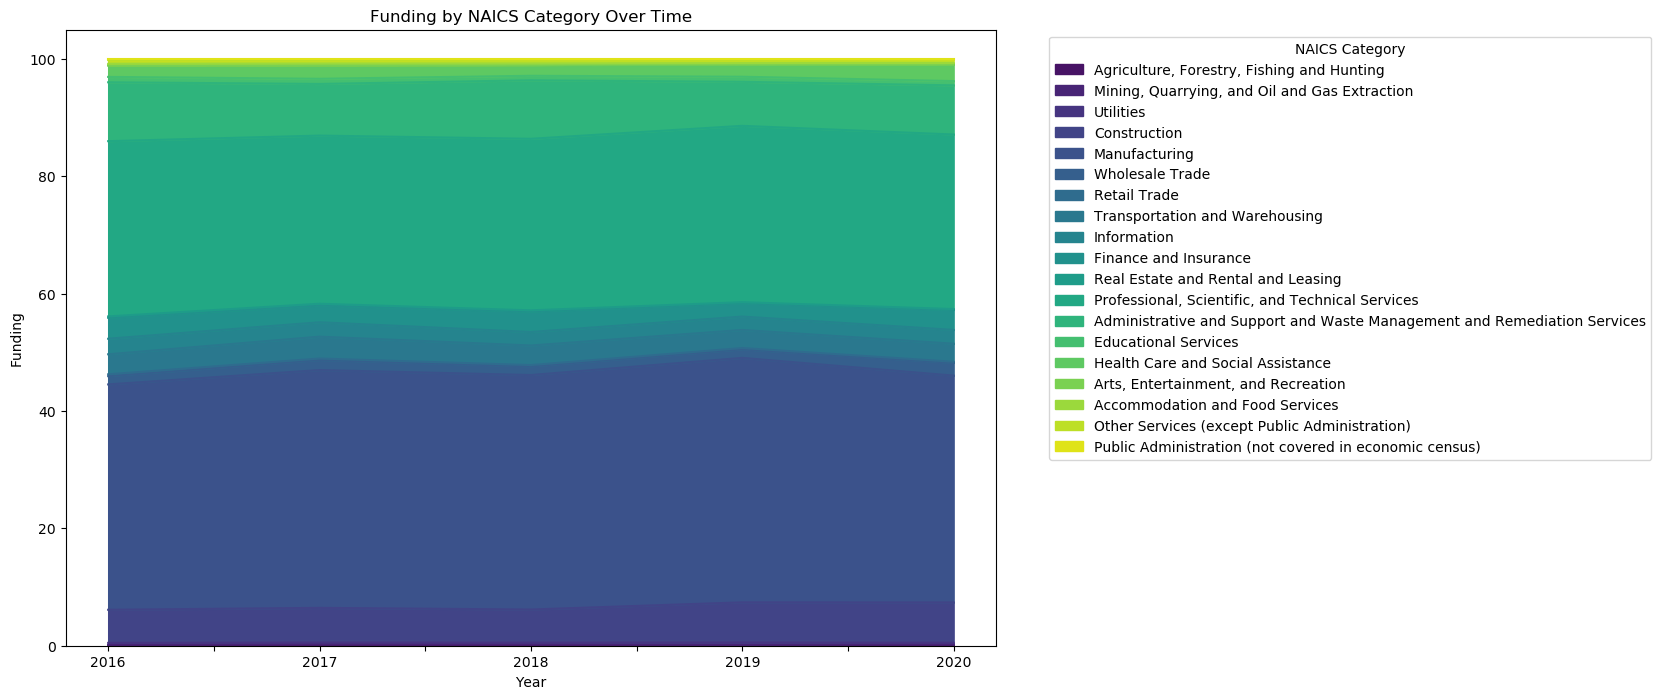

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn as default color palette
sns.set_palette("viridis", n_colors=19)

# Read CSV file
df = pd.read_csv('us_funding_time_series.csv', index_col=0)

# Plot stacked area chart
ax = df.T.plot(kind='area', stacked=True, figsize=(12,8))

# Set different colors for each category using a color palette
colors = sns.color_palette()
for i, col in enumerate(ax.get_legend().get_texts()):
    col.set_color(colors[i])

# Add title and labels
plt.title('Funding by NAICS Category Over Time')
plt.xlabel('Year')
plt.ylabel('Funding')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.show()


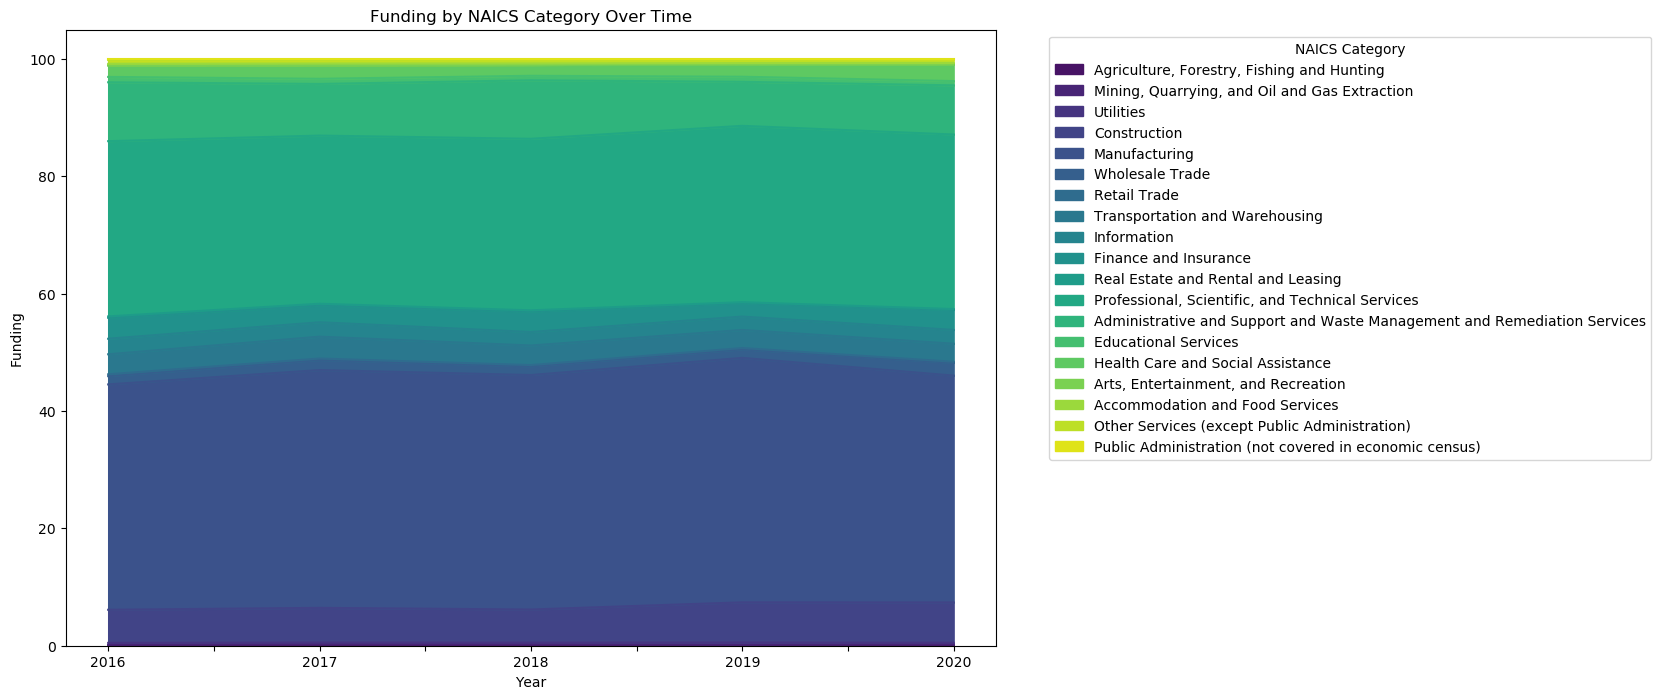

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Generate a color palette with 19 different colors using the 'turbo' colorscale in Plotly
n_colors = 19
colors = px.colors.sample_colorscale("turbo", [n/(n_colors-1) for n in range(n_colors)])

# Read CSV file
df = pd.read_csv('us_funding_time_series.csv', index_col=0)

# Plot stacked area chart
ax = df.T.plot(kind='area', stacked=True, figsize=(12,8))

# Set different colors for each category using the color palette
for i, col in enumerate(ax.get_legend().get_texts()):
    col.set_color(colors[i])

# Add title and labels
plt.title('Funding by NAICS Category Over Time')
plt.xlabel('Year')
plt.ylabel('Funding')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.show()


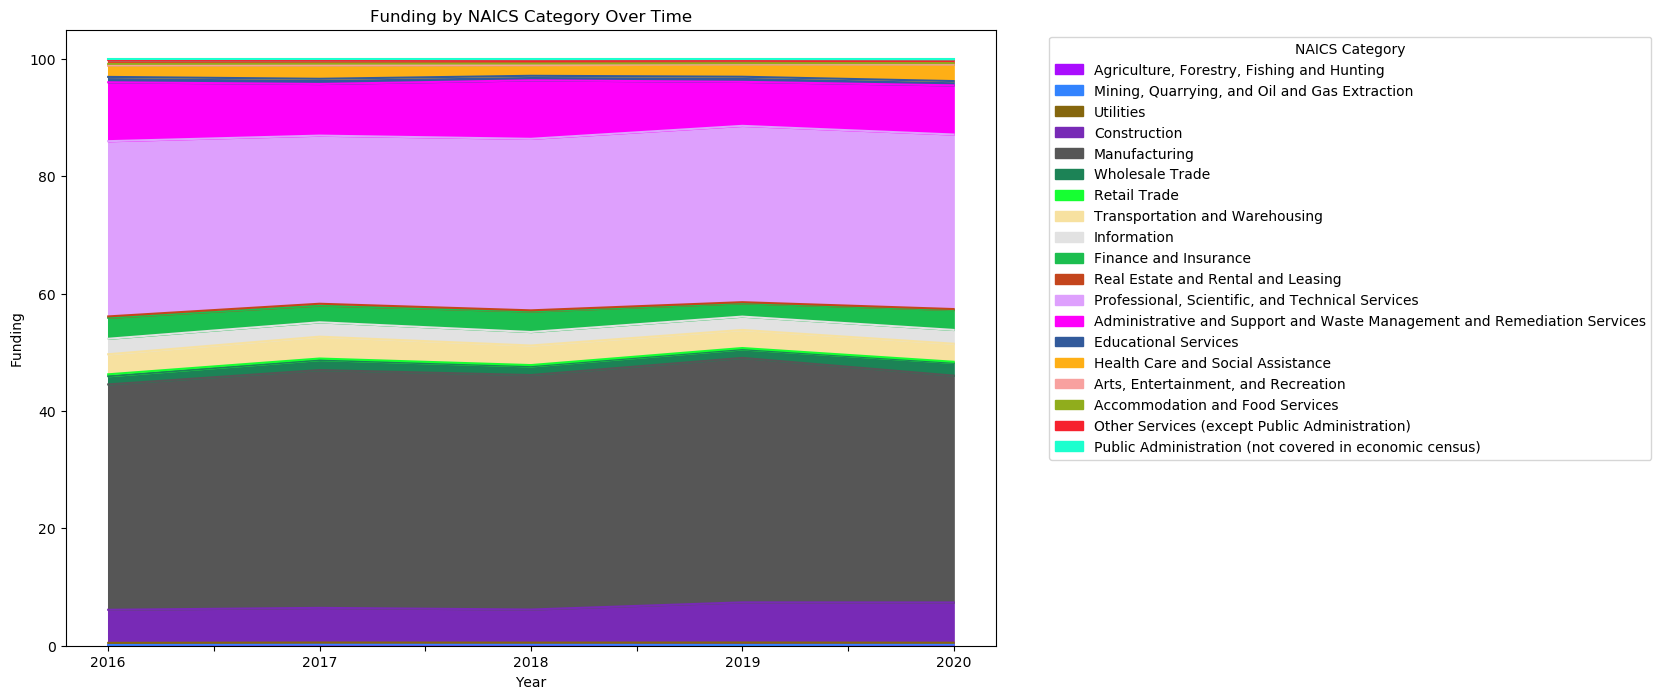

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read CSV file
df = pd.read_csv('us_funding_time_series.csv', index_col=0)

# Generate a list of 19 very distinguishable colors
colors = px.colors.qualitative.Alphabet

# Plot stacked area chart with the colors
df.T.plot(kind='area', stacked=True, figsize=(12,8), color=colors)

# Add title and labels
plt.title('Funding by NAICS Category Over Time')
plt.xlabel('Year')
plt.ylabel('Funding')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.show()


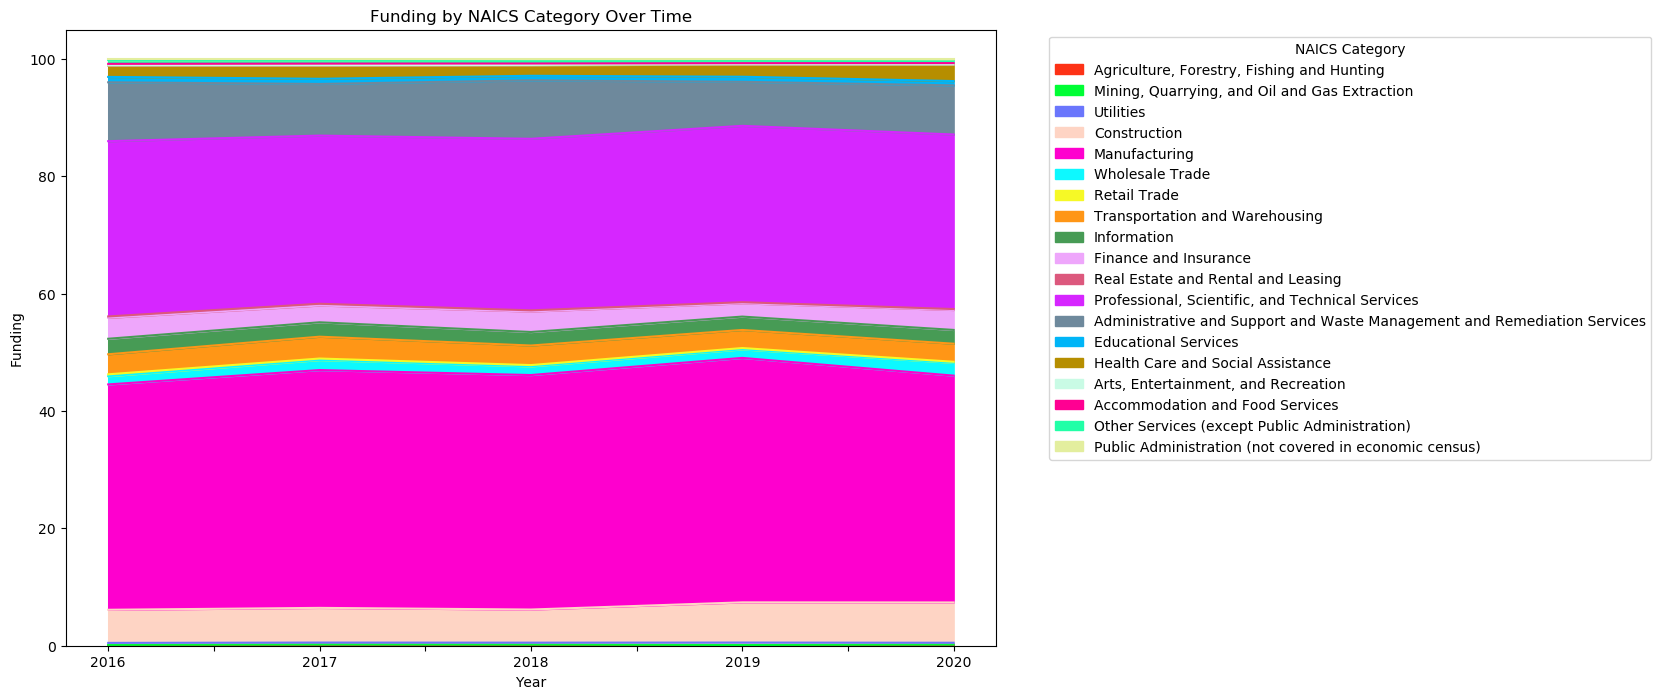

# Word Cloud

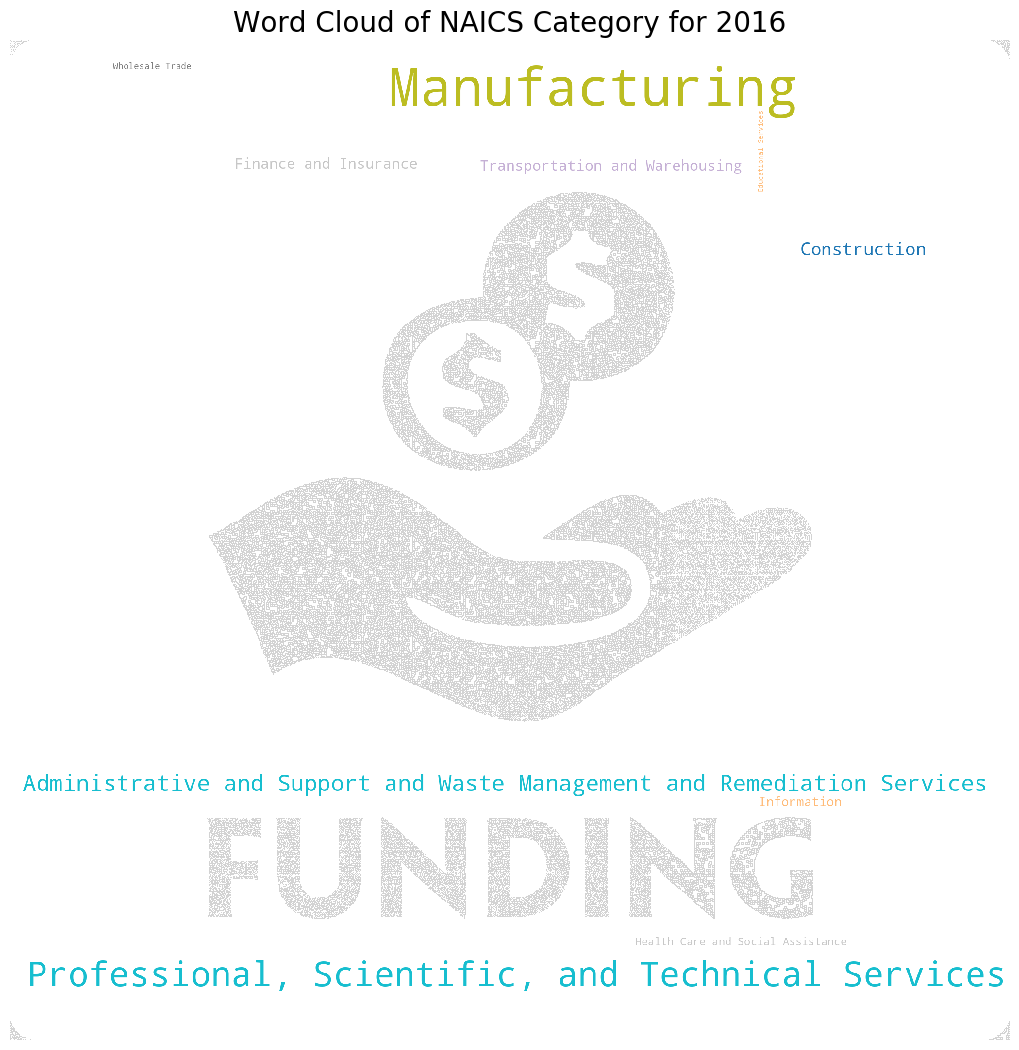

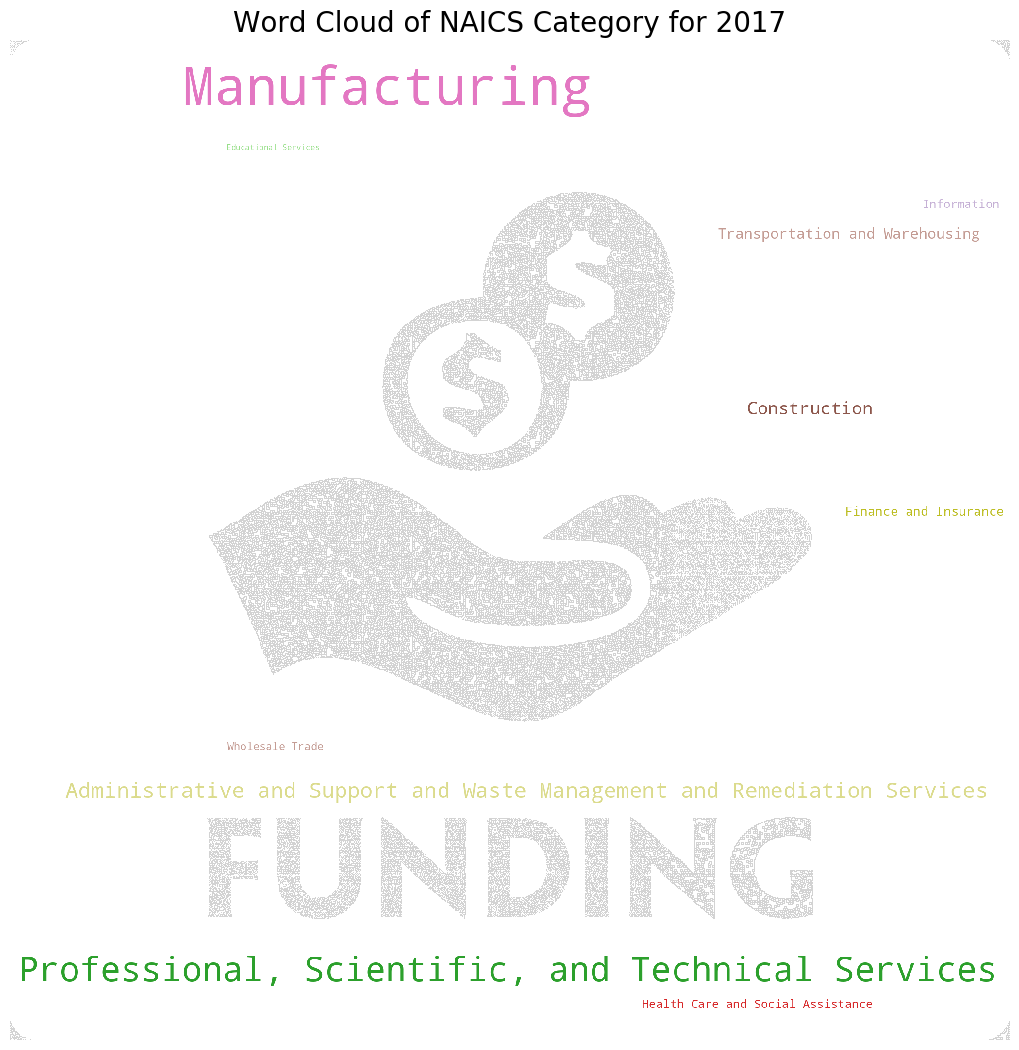

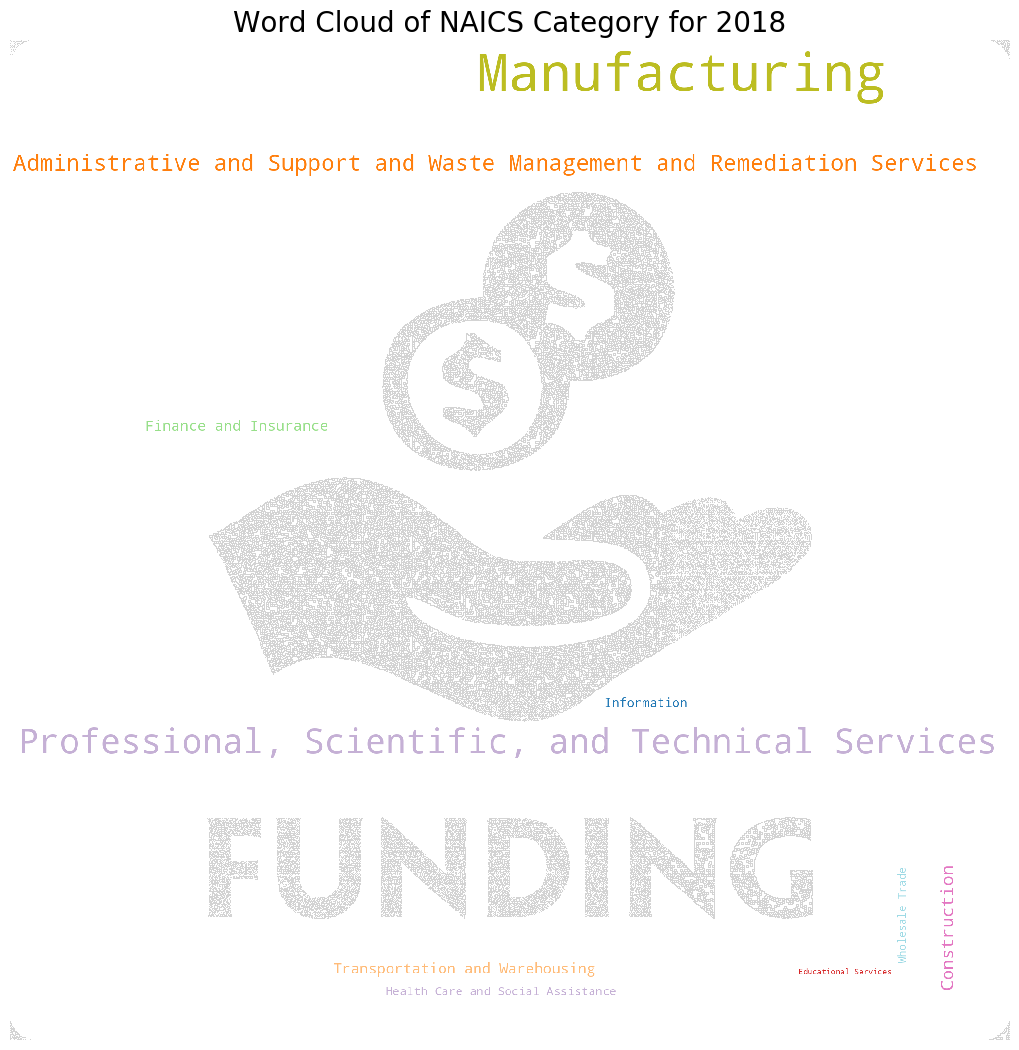

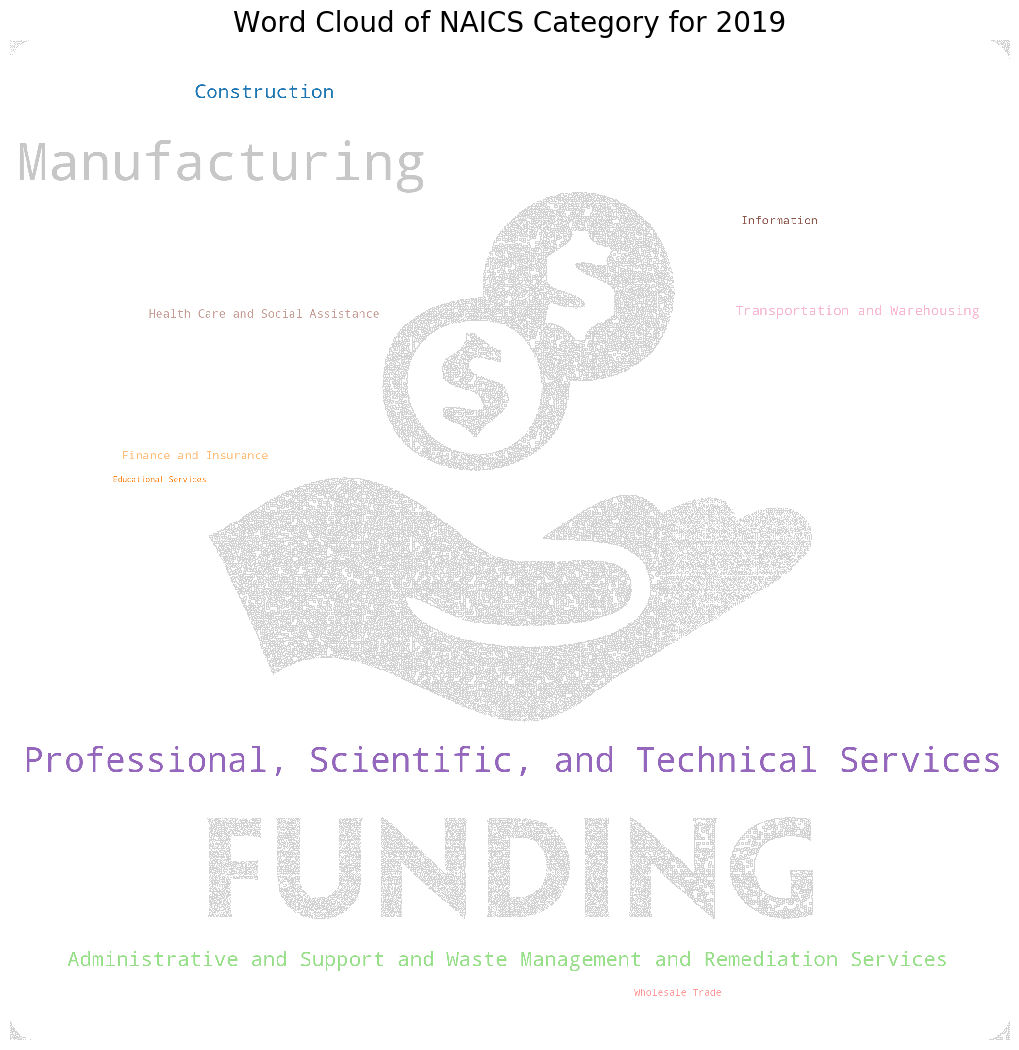

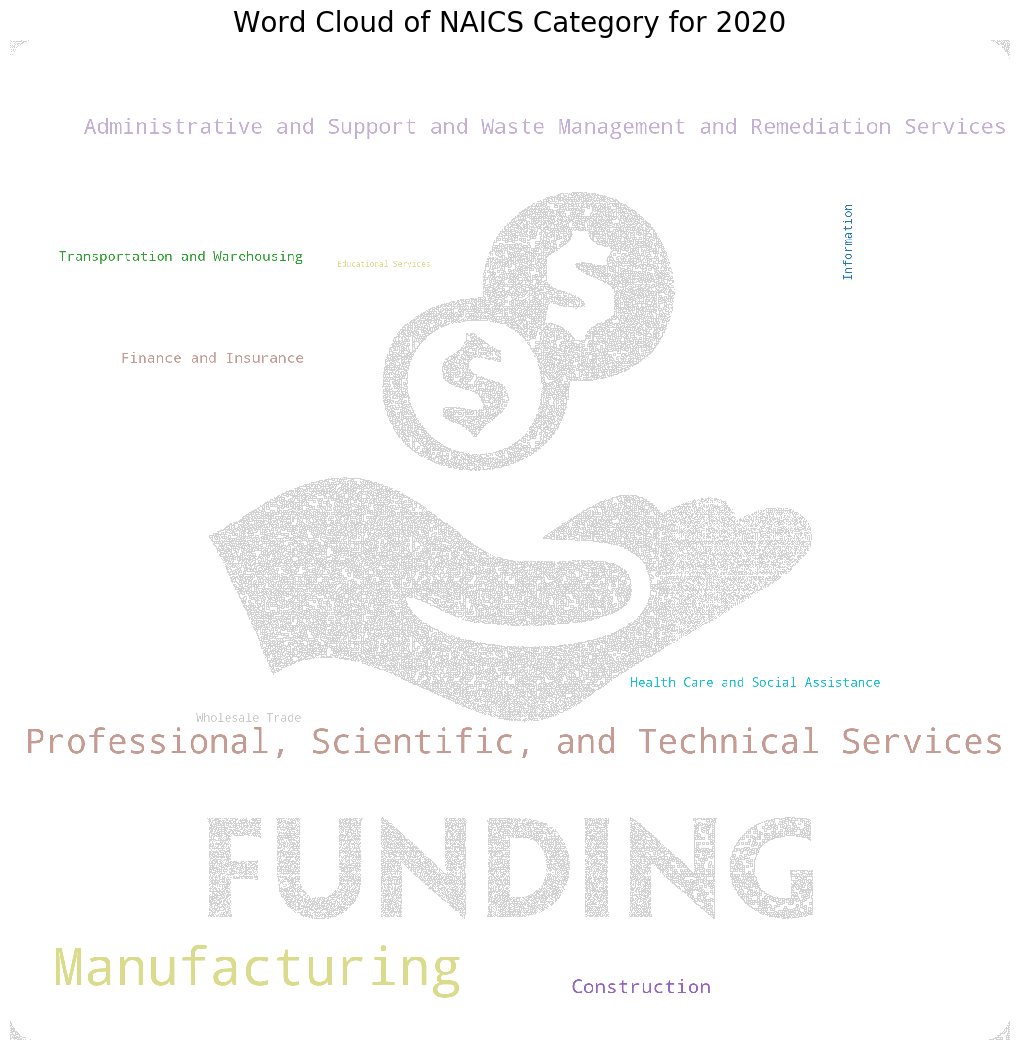

In [173]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def create_word_clouds():

    # read the csv file
    df = pd.read_csv('us_funding_time_series.csv')

    # load the funding image
    funding_mask = np.array(Image.open("Funding2.png"))

    # loop through the years
    for year in range(2016, 2021):
        # create a dictionary that contains the NAICS category as the key and the funding percentage for the current year as the value
        category_weight = {}
        for index, row in df.iterrows():
            category = row['NAICS Category']
            weight = row[str(year)]
            category_weight[category] = weight

        # sort the dictionary by value in descending order and select the top 10 categories
        top_categories = dict(sorted(category_weight.items(), key=lambda item: item[1], reverse=True)[:10])

        # create a word cloud object and generate the word cloud using the dictionary and the funding image as the mask
        wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        min_font_size = 7,
                        max_words = 50, # limit the number of words
                        mask = funding_mask, # use the funding image as the mask
                        contour_width=1, # add contour lines to the text
                        contour_color='lightgrey', # set contour line color
                        colormap='tab20',
                        scale=2 # set color palette
                    ).generate_from_frequencies(top_categories)

        # plot the word cloud using matplotlib
        plt.figure(figsize = (10, 10), facecolor = None) 
        plt.imshow(wordcloud, aspect='auto') # use equal aspect ratio to prevent stretching
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title(f"Word Cloud of NAICS Category for {year}", fontsize=20) # add a title
        plt.show()


create_word_clouds()

In [6]:
import pandas as pd
import plotly.express as px

# Create an empty list to store the DataFrames
dfs = []

# Loop over the years
for year in range(2016, 2021):
    # Read in the per capita analysis csv for the year
    df = pd.read_csv(f"{year}_per_capita_analysis.csv")
    # Drop the rows for the United States
    df = df.drop(df[df["State"] == "United States"].index)
    # Add a column for the year
    df["Year"] = year
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate the DataFrames into one
df = pd.concat(dfs)

# Read in the population data
df_pop = pd.read_csv('us_cleaned_population.csv')

# Merge the population data with the expenditure and funding data
df_merge = pd.merge(df, df_pop, on='State', how='left')

# Calculate the total expenditure and funding for each state for each year
df_grouped = df_merge.groupby(['Year', 'State', 'Population'], as_index=False).sum()

# Remove the United States from the data
df_grouped = df_grouped[df_grouped['State'] != 'United States']

# Define a list of color codes
colors = px.colors.qualitative.Alphabet

# Create a scatter plot of expenditure per capita vs funding per capita
fig = px.scatter(df_grouped, 
                x='Funding received per Capita (in thousands)', 
                y='Expenditure per Capita (in thousands)', 
                color='State', 
                hover_name='State', 
                size='Population', 
                animation_frame='Year', 
                color_discrete_sequence=colors
                )

# Set the title
fig.update_layout(title='Expenditure per Capita vs Funding received per Capita (2016-2020)')

# Show the plot
fig.show()

In [7]:
    dfs = []

    # Load data for each year
    for year in range(2016, 2021):
        # Read in the per capita analysis csv for the year
        df = pd.read_csv(f"{year}_per_capita_analysis.csv")
        df = df.drop(df[df["State"] == "United States"].index)
        df["Year"] = year
        dfs.append(df)

    df = pd.concat(dfs)
    df_pop = pd.read_csv('us_cleaned_population.csv')
    df_merge = pd.merge(df, df_pop, on='State', how='left')

    # Calculate the total expenditure and funding for each state for each year
    df_grouped = df_merge.groupby(['Year', 'State', 'Population'], as_index=False).sum()

    # Remove the United States from the data
    df_grouped = df_grouped[df_grouped['State'] != 'United States']

    # Create a scatter plot of expenditure per capita vs funding per capita
    fig = px.scatter(df_grouped, 
                    x='Funding received per Capita (in thousands)', 
                    y='Expenditure per Capita (in thousands)', 
                    color='State', 
                    hover_name='State', 
                    size='Population', 
                    animation_frame='Year', 
                    color_discrete_sequence=px.colors.qualitative.Alphabet
                    )

    fig.update_layout(title='Expenditure per Capita vs Funding received per Capita (2016-2020)')

    # Show the plot
    fig.show()

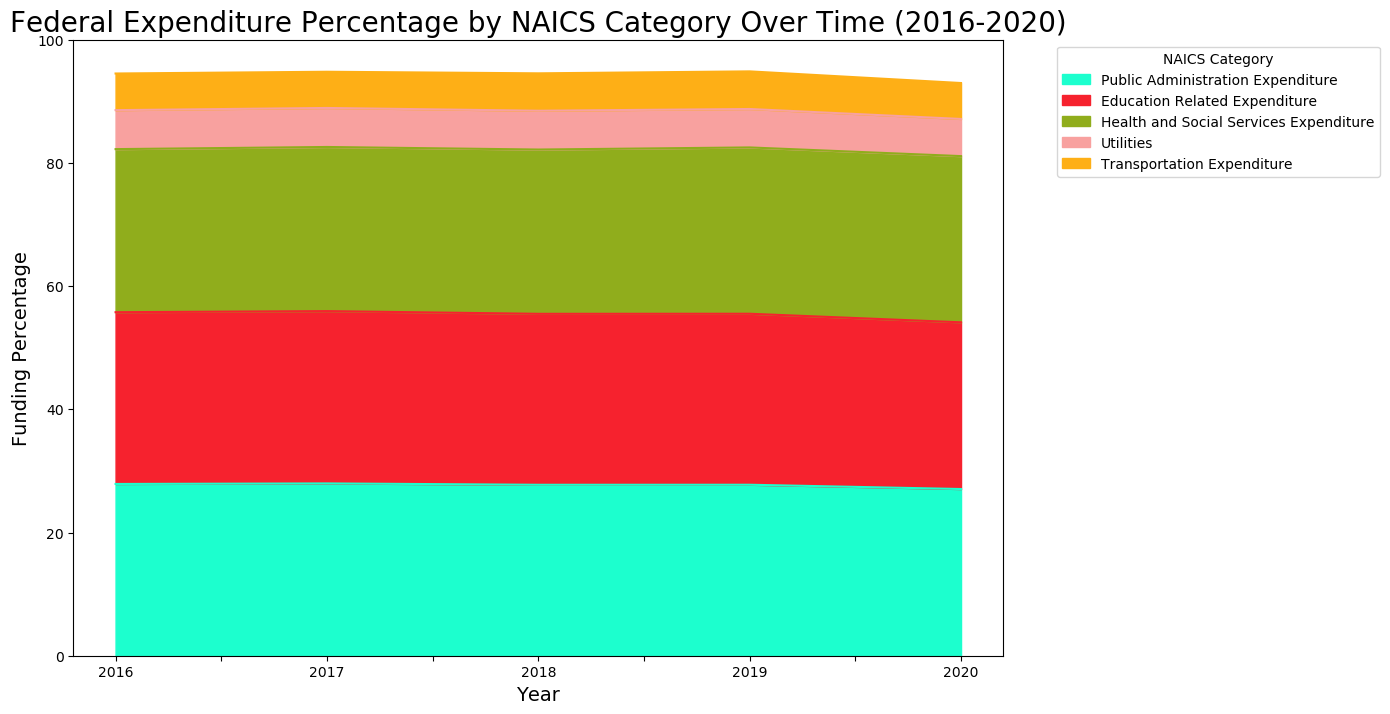

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

def funding_stacked_area_chart():
    """
    Create a stacked area chart showing federal funding percentage by NAICS 
    category over time (2016-2020).
    """

    df = pd.read_csv('us_expenditure_time_series.csv', index_col=0)

    # Sort the DataFrame in descending order based on the sum of each row
    df = df.loc[df.sum(axis=1).sort_values(ascending=True).index]

    # Reverse the order of the rows
    df = df.iloc[::-1]

    # Plot stacked area chart with the colors and set y-axis limits
    df.T.plot(kind='area', 
            stacked=True, 
            figsize=(12,8), 
            color=px.colors.qualitative.Alphabet[:19][::-1], 
            ylim=(0, 100)
            )

    # Add title and labels
    plt.title('Federal Expenditure Percentage by NAICS Category Over Time (2016-2020)', fontsize=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Funding Percentage', fontsize=14)
    plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show chart
    plt.show()

funding_stacked_area_chart()

In [16]:
def top_10_categories_stacked_bar_chart():
    """
    Create a stacked bar chart using Plotly Express to show the top 10 NAICS 
    categories that received federal funding between 2016 and 2020. 
    The chart displays the funding percentage for each category in each year.
    """

    df = pd.read_csv('us_expenditure_time_series.csv')

    # Calculate the mean funding percentage for each category over the 5-year period
    df_mean = df.loc[:, '2016':'2020'].mean(axis=1)
    df_mean.index = df['Category']
    df_mean = df_mean.reset_index(name='Mean Percentage')

    # Sort the data by the mean funding percentage and select only the top 10 categories
    df_top_10 = df_mean.sort_values(by='Mean Percentage', ascending=False)
    category_order = df_top_10['Category'].tolist()

    # Filter the original dataframe to include only the top 10 categories
    df_filtered = df[df['Category'].isin(category_order)]

    # Melt the data so that each row represents a single observation
    df_melt = pd.melt(df_filtered, id_vars=['Category'], var_name='Year', value_name='Expenditure Percentage')

    # Create the stacked bar chart using Plotly Express and set the category order
    fig = px.bar(df_melt, 
                x='Year', 
                y='Expenditure Percentage', 
                color='Category', 
                barmode='stack', 
                category_orders={'Category': category_order}
                )

    # Update the figure information
    fig.update_xaxes(type='category')
    fig.update_layout(title='Categories Expediture by Year (2016-2020)')

    # Show chart
    fig.show()

top_10_categories_stacked_bar_chart()